### <p style="text-align: right;"> &#9989; Filip Jevtic.</p>

# Homework Assignment #1 (Individual)
## Git Practice, Debugging Practice, Modeling World Population, and Writing Python Scripts


### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Use Git to create a repository, track changes to the files within the repository, and push those changes to a remote repository.
* Debug Python code.
* Get more experience with Pandas using excel spread sheets.
* Make plots of your model using <code>matplotlib</code>.
* Practice writing and executing a Python script.

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **25 points** possible on this assignment. Point values for each part are included in the section headers.

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, January 24.** It should be uploaded into the "Homework Assignments" submission folder for Homework #1 in your D2L webpage.  Submission instructions can be found at the end of the notebook.

---
## Part 1: Setting up a git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-s20-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

1. Navigate to your `cmse202-s20-turnin` repository and create a new directory called `hw-01`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your PTA as a collaborators\ to your "turnin" respository with "Read" access so that we can see your assignment. 
* Section 001: nchamusah14
* Section 002: nchamusah14
* Section 003: genster6

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**.

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s20-turnin`" repository inside the `hw-01` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

---

---

## Part 2: Debugging code: understanding error messages (6 points)

For the next part of this assignment, you're going to presented with a variety of code bugs and your job is to fix them.

### Fixing errors

<p style="text-align: left;"> &#9989; To Do</p> 
For each piece of code, rewrite it in the cell below and fix the error so that the code runs. If it is a runtime error, fix it with a message to avoid running the incorrect code. In the code you write, provide a comment as to what was wrong.

In [2]:
for i in range(10):
    print("The value of i is {}".format(i))

The value of i is 0
The value of i is 1
The value of i is 2
The value of i is 3
The value of i is 4
The value of i is 5
The value of i is 6
The value of i is 7
The value of i is 8
The value of i is 9


In [ ]:
# Syntax error. Missing colon.

In [3]:
cnt = 10
the_sum = 0
for i in range(cnt):
    if i%2 == 0:
        the_sum += i
print("The sum of the even number from {} to {} is {}".format(0,cnt,the_sum))

IndentationError: expected an indented block (<ipython-input-3-aa008b543fa3>, line 5)

In [4]:
# Indentation Error. Line 5 needed indent.

In [81]:
def compute_fraction(numerator, denominator):
    if(denominator != 0):
        fraction = numerator/denominator
        print("The value of the fraction is {}".format(fraction))
    else:
        print("Zero Divison Error!")

compute_fraction(25,5)
compute_fraction(5,25)
compute_fraction(5, 0)

The value of the fraction is 5.0
The value of the fraction is 0.2
Zero Divison Error!


In [82]:
# Division By Zero Error. Needed conditional statement.

In [83]:
import numpy as np
import random

cnt = 10
n = np.arange(cnt)
for i in range(cnt):
    n[i] = random.randint(100,1000)
print(i)
print("The value of the 10th element is {}".format(n[cnt-1]))

9
The value of the 10th element is 265


In [84]:
# Index error, 9 is the correct value for the 10th element.

In [85]:
cnt = 100
even = [ i for i in range(cnt) if i%2 == 0 ]

print("The largest even number in the range {} to {} is {}".format(0,cnt,max(even)))

The largest even number in the range 0 to 100 is 98


In [86]:
# Error on line 2, the if statement condition needs to be more specific to filter out numbers that are even.

In [87]:
spanish = { 
'hello':'hola',
'yes':'si',
'one':'uno'
}

print("'Hello' in spanish is {}".format(spanish['hello']))

'Hello' in spanish is hola


In [88]:
# Missing comma on line 3 to denote the next element. Incorrect key when calling "hello", needed to change H to lowercase.

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 2", and push the changes to GitHub.

---

## Part 3: Reading in the Migrant Flow Data (7 points)

Before we go too far, let's pull in all the imports we need. If we have to, we can come back here and do it again in one cell.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

OK, let's get started. One of the things you have to do as a Data Scientist is work with what you are given. The data below is not perfect but we are going to work our way through to make it work for us. 

Take a look a the web page below:

["Visualizing Migrant Flows"](https://download.gsb.bund.de/BIB/global_flow/)

It is a very well thought out way to visualize the movement of migrants to and from the various countries of the world from 1990 to 2010. Some of the movement may surprise you. The data was collected originally for a paper in 2014 titled ["Quantifying Global International Migration Flows"](https://science.sciencemag.org/content/343/6178/1520/tab-figures-data). The database S2 in the link is the source of the data, an excel spread sheet. That spread sheet is in the D2L location for this homework and called `migrant_flows.xlsx`.

You read the sheet in the following way (in Excel):
* you select a sheet at the bottom representing a 5 year period
* the rows indicate the origin/source country
* the columns represent the destination country

Thus the totals at the end of a row represent how many people left the country during that 5 year span and the column totals represent how many people entered the country during that 5 year span. Any particular cell indicates: row: leaving , col: entering. For example, on the sheet tab `1990-95`, `Australia` (row) had 67 people leave for `Aruba` (col).

We are going to work on gathering and manipulating some of that data using pandas. We are going to stretch our understanding a bit about what we can do with pandas to deal with data that doesn't quite fit the norm.

We are going to go over some issues this particular spreadsheet has that you may not have seen before. Having gotten through those issues, we can do some analysis and potentially some model building. 

## Important Note:
You **cannot** modify the original spreadsheet provided. We will test your code using the original spread sheet!

### 3.1 Pandas and excel spread sheets (1 point)
Let's start easy with some simple example spread sheets. Pandas has a function `read_excel` (["manual page"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) ) that has a lot of details. Let's try to break it down a bit.

There is a spreadsheet in D2L called `sheet1.xlsx`. You can read in this simple sheet using `read_excel` as you would `read_csv`. There is only 1 sheet (tab at the bottom when you open the sheet in Excel) named `ClassGrades`. If there is only one sheet, `read_excel` reads in that sheet

<p style="text-align: left;"> &#9989; To Do</p>

Read in that data sheet and print out the names of every person whose `Grade` is strictly less than a 3.0. Write that code in the cell below. Do as you wish but two possible approaches are:
* iterate through the rows of the data frame, see `iterrrows`
* print the `Names` of people whose `Grades` are less than 3

In [91]:

sheet1 = pd.read_excel('sheet1.xlsx', sheet_name='ClassGrades')
names = sheet1['Names']
grades = sheet1['Grade'] < 3.0
names_less = names[grades]
print(names_less)

1     Jane
4    Larry
Name: Names, dtype: object


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.1", and push the changes to GitHub.

---

### 3.2 Multiple Sheets (1 point)

Take a look at `sheet2.xlsx` in the D2L directory. It has two sheets (tabs at the bottom when you look at it with Excel) labeled `J_names` and `M_names`. If you just load the sheet as before, you only get the first sheet (in this case the `J_names`). However, there is an optional argument called `sheet_names` (note the underline). 
* if you do not provide this argument, you get only the first sheet
* if you provide the actual sheet name as an argument, you get that sheet as a data frame
* if you provide an integer, you can the sheet the integer represents (first sheet is 0, left to right numbering)
* if you provide as an argument to `sheet_name` the value `None`, you get a dictionary back where the key is the sheet name and the value is the data frame associated with the sheet name

<p style="text-align: left;"> &#9989; To Do</p>

Write the code below that looks at **all** sheets and reports **all** `Names` whose `Grade` is  less than 3. 

In [92]:
# your code here
sheet2 = pd.read_excel('sheet2.xlsx',sheet_name = None )
j = sheet2['J_names']
m = sheet2['M_names']
j_names = j['Names']
j_grades = j['Grade'] < 3.0
j_less = j_names[j_grades]
m_names = m['Names']
m_grades = m['Grade'] < 3.0
m_less = m_names[m_grades]
all_names = list(j_less.append(m_less))
print(all_names)

['Jamie', 'Josie', 'Madhur', 'Madison', 'Makena']


Again, there are choices here and you are free to do as you like but some possibilities include:

* iterate through the sheets, then the rows in the data frame of each sheet
* again, iterate through the sheets, subset each data frame and collect the results

It is useful to note that the result of an expression that produces a panda data series (play with this, use the python command `type` to examine return values) can be coerced to a `list` data type with the `list` command.

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.2", and push the changes to GitHub.

---

### 3.3 Dealing with weird headers (1 point)

Pandas really likes it if it has headers for the rows and columns of the sheet you read in. Unfortunately, sometimes people decorate a spreadsheet with all kinds of helpful information for people which basically prevents you from getting the right headers setup in pandas. Take a look at `sheet3.xlsx`. It is a single sheet but I put in some header stuff which gets in pandas way. Nonethless, let's try reading it in directly and see what we get.

In [93]:
df3 = pd.read_excel("sheet3.xlsx")
df3

,Bad Row,Unnamed: 1,Unnamed: 2,Unnamed: 3
Bad Column,Names,Percentage,Grade,NaN
NaN,Frankie,89,3.5,1.0
NaN,Fergie,25,0,0.0
NaN,Felicia,92,4,1.0
NaN,Felix,70,2,0.0
NaN,NaN,69,2.375,0.0


That's pretty wrong I would say. Weird headers, lot of NaN, etc. But we can change what we read in with two other parameters of `read_excel`
* `skiprows` takes an integer list of rows (starting with the first row as 0) to *exclude* from the data frame
* `usecols` takes a bit of the opposited approach. It has a few more options, but one of them is a list of integers indicating the columns to *include* 

By using these two arguments we can get back to making a sane data frame.

In [265]:
df = pd.read_excel('sheet3.xlsx', skiprows=[0], usecols=[1,2,3,4])
df

,Names,Percentage,Grade,Unnamed: 3
0,Frankie,89,3.500,1
1,Fergie,25,0.000,0
2,Felicia,92,4.000,1
3,Felix,70,2.000,0
4,NaN,69,2.375,0


We still have a bit of a problem. Because of our manipulation (or because someone just forgot) a label might be missing. Here, the label of the 4th column is missing so the system names it `Unnamed: 4`. Pandas will name anything it *thinks* should have a label in this way. You can rename anything you like, and that might things better for running the system. Note als0 that the last value in `Names` was missing and, since pandas assumes that should be a value, it sets it to `NaN`, meaning "Not a Number". Accurate but not particularly informative.

You can rename a column with the `.rename` method. It takes a dictionary of `"old_name":"new_name"` pairs for the columns. The call looks like

`df.rename(columns={"old1":"new1", "old2":"new2"}, inplace=True)` 

Works for as many columns as you wish to rename. Normally `.rename` returns a new data frame but `inplace=True` changes the called data frame. 

For a data frame with an index, you can also use `index` in place of `columns` above and change a value in the index list, as in

`df.rename(index={"old1":"new1", "old2":"new2"}, inplace=True)`. 

If the value is listed as `NaN`, then that is actually `numpy.nan` as a value. 

<p style="text-align: left;"> &#9989; To Do</p>

Read in the same `sheet3.xlsx` using the `skiprows` and `usecols` as shown above and rename the last column to be "Pass/NonPass". Show the sheet.

In [266]:
# your code here
sheet3 = pd.read_excel('sheet3.xlsx',skiprows = [0],usecols = [1,2,3,4])
sheet3.rename(columns={"Unnamed: 3":"Pass/NonPass"}, inplace = True)
sheet3

,Names,Percentage,Grade,Pass/NonPass
0,Frankie,89,3.500,1
1,Fergie,25,0.000,0
2,Felicia,92,4.000,1
3,Felix,70,2.000,0
4,NaN,69,2.375,0


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.3", and push the changes to GitHub.

---

### 3.4 The real work (4 points)
We are ready to read in our spread sheet. Here are some things to remind you how pandas works:
* the `.set_index` method allows you to establish a particular column as an index for the sheet such that the row values can be used as indicies. That is very helpful.
   * note that `.set_index` typically does not update the data frame itself but returns a new one. **However**, you can provide an argument called `inplace=True` which will in fact update the called frame. That is important to remember
* for a particular cell, you can index a cell with the `.loc` method, using a list of two labels: `df.loc["row_label","col_label"]`. You can access or set a value for a cell this way. 
   * for this to work you have to have set the index for a particular set of row labels and pandas has to recognize there is a label for each column (you have to have set it up right)

<p style="text-align: left;"> &#9989; To Do</p>

Write a function called `read_migrant_flow` that reads in the file `migrant_flow.xlsx` and returns a dictionary of sheets to data frames. In detail the function should:

* Read in the spreadsheet `migrant_flow.xlsx`
   * Read in all the sheets as a map called `sheet_map`
   * As numbered in Excel for the spreadsheet (not necessarily how you number it in pandas), skip rows 1 and 3, skip columns A and C.
   * for each sheet:
        * rename the column `Unnamed: 1` to `Origin`
        * set the index of the sheet to `Origin`
        * rename the column `Unnamed: 199` to `Outof`
        * rename the last cell of `Origin` (presently NaN) to `Into`

In [296]:
# your code here
def read_migrant_flow():
    sheet_map = pd.read_excel('migrant_flow.xlsx',sheet_name = None,skiprows = [0,2])
    for sheet_name in sheet_map:
        sheet = sheet_map[sheet_name]
        sheet.drop(["Unnamed: 0","Unnamed: 2"],axis = 1,inplace = True)
        sheet.rename(columns={"Unnamed: 1":"Origin","Unnamed: 199":"Outof"},inplace = True)
        sheet.set_index("Origin",inplace = True)
        sheet.rename(index={np.nan:"Into"}, inplace=True)
    return sheet_map

In [297]:
# test yourself, should come back all `True`
sheet_map = read_migrant_flow()
first_df = sheet_map["1990-95"]
first_df
print(first_df.loc["Greece","France"] == 166)

True


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.4", and push the changes to GitHub.

---

## 4 Doing some work with the Migrant Flow Data (7 points)

OK, we have the data, now let's do some work with what we have gathered. You have some experience with pandas but here are some things you might want to check out that might be of some help:

* `.iterrows()` as a way to iterate through a row
* `.max()` and `.idxmax()` (as well as the associated mins) to fine the largest value in a pandas Series (a row) and the id associated with that max
* `.sort_values()` allows you to sort the elements of a Series
* `.bar.plot()` for plotting a Series

We'll add more as we think of them. 

<p style="text-align: left;"> &#9989; To Do</p>

### 4.1 Top destinations (2 points)
Write a function called `top_dests` that takes a single argument, a data frame. It should plot as a bar chart the top 10 destination countries and the number of immigrants that came. 

In [298]:
# your answer here
def top_dests(df):
    df = df.transpose()
    destinations = df["Into"]
    sorted_dest = destinations.sort_values(ascending = False)[1:11]
    sorted_dest.plot.bar()

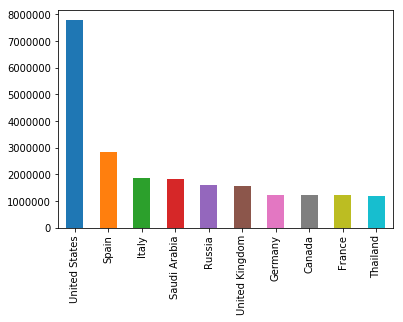

In [299]:
# should show a nice bar chart
sheet_map = read_migrant_flow()
df = sheet_map["2000-05"]
top_dests(df)

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 4.1", and push the changes to GitHub.

---

### 4.2 Top Source Countries (2 points)

<p style="text-align: left;"> &#9989; To Do</p>

Write a function called `top_leaving` that takes a single argument, a data frame. It should plot as a bar chart the top 10 source countries (countries with the largest number of people leaving) and the immigrant count. 

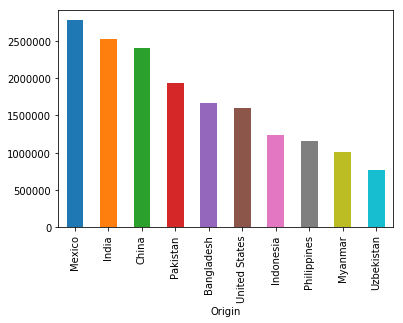

In [300]:

def top_leaving(df):
    destinations = df["Outof"]
    sorted_dest = destinations.sort_values(ascending = False)[1:11]
    sorted_dest.plot.bar()
sheet_map = read_migrant_flow()
df = sheet_map["2000-05"]
top_leaving(df)

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 4.2", and push the changes to GitHub.

---

### 4.3 Biggest Flow (3 points)

<p style="text-align: left;"> &#9989; To Do</p>

Write a function called `biggest_flow` that takes a single argument, a data frame. It should return a string that indicates what the largest flow was between two countries. Include the source country, the destination country and the number of people. 

In [308]:

def biggest_flow(df):
    max_val = 0
    for row_ind,row in df.iterrows():
        df.drop("Outof",axis = 1,inplace = True)
        df.drop("Into",axis = 0,inplace = True)
        if(row.max()> max_val):
            max_val = row.max()
            max_dest = row.idxmax()
            max_origin = row_ind

    return max_origin,max_dest,max_val
df = sheet_map["1990-95"]
print(biggest_flow(df))

('Pakistan', 'Afghanistan', 2462482)


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 4.3", and push the changes to GitHub.

---

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [309]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSed0pJixzf3-61_j0H4i-KHHYE6_WiSVsvxlAD0FarOC5L0OQ/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #1, and upload it there.

&#169; Copyright 2018,  Michigan State University Board of Trustees